# Question 19

in relation to the Gujarati book (basic econometrics), answer question 22.25 pp 800: Table 22.7 gives data on three-month (TB3M) and six-month (TB6M) Treasury bill rates from January 1, 1982, to March 2008, for a total of 315 monthly observations.

The data can be found on the textbook's website.

to. Plot the two time series in the same diagram. What do you see?

b. Do a formal unit root analysis to find out if these time series are stationary.

c. Are the two time series cointegrated? How do you know? Show the necessary
calculations.

d. What is the economic meaning of cointegration in the present context? If the two series are not cointegrated, what are the economic implications?
and. If you want to estimate a VAR model, say, with four lags of each variable, do you have to use the first differences of the two series or can you do the analysis in levels of the two series? Justify your answer.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()


Saving ECO_Tabla 2 Q19.xlsx to ECO_Tabla 2 Q19.xlsx


In [3]:
rate3=pd.read_excel("ECO_Tabla 2 Q19.xlsx")["GS3M"]
rate6=pd.read_excel("ECO_Tabla 2 Q19.xlsx")["GS6M"]

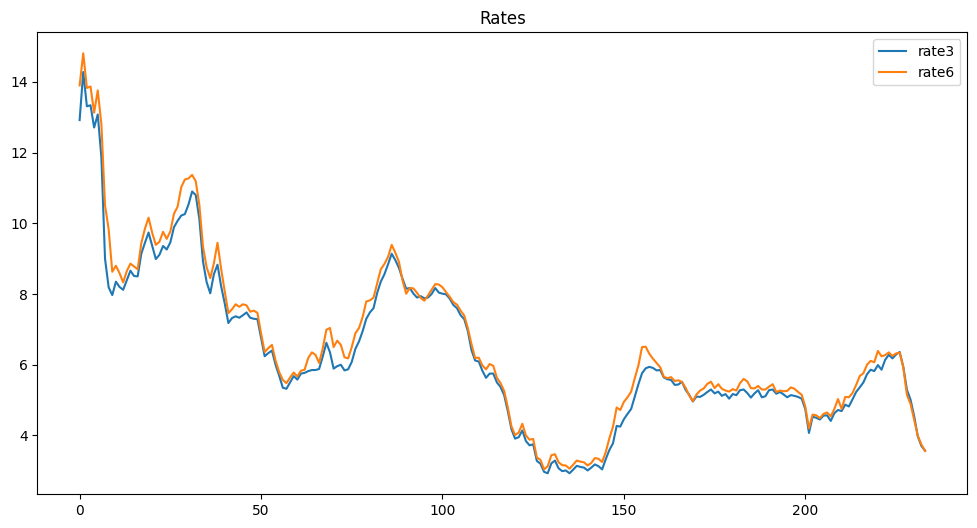

In [5]:
# Plot the series
plt.figure(figsize=(12,6))
plt.plot(rate3, label='rate3')
plt.plot(rate6, label='rate6')
plt.title('Rates')
plt.legend()
plt.show()


In [6]:
#Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(rate3, "rate3")
unit_root_tests(rate6, "rate6")



Unit Root Tests for rate3:
ADF Test:
ADF Statistic: -1.5392
p-value: 0.5140
Critical Values: {'1%': np.float64(-3.460018927623594), '5%': np.float64(-2.8745897386146817), '10%': np.float64(-2.57372514086348)}

KPSS Test:
KPSS Statistic: 1.4540
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for rate6:
ADF Test:
ADF Statistic: -3.7738
p-value: 0.0032
Critical Values: {'1%': np.float64(-3.458854867412691), '5%': np.float64(-2.8740800599399323), '10%': np.float64(-2.573453223097503)}

KPSS Test:
KPSS Statistic: 1.4961
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


# Interpretation

# Rate 3

Since the ADF statistic (-1.5392) is greater (less negative) than all critical values and the p-value (0.5140) is well above 0.05, we fail to reject the null hypothesis.

The rate3 series has a unit root, it is non-stationary.

The KPSS statistic (1.4540) exceeds even the 1% critical value (0.739), so we reject the null hypothesis of stationarity.

Both ADF and KPSS tests indicate non-stationarity. Therefore, rate3 likely needs to be differenced once (d=1) before modeling with ARIMA or similar approaches.

# Rate 6

The ADF statistic (-3.7738) is less than all critical values, and the p-value (0.0032) is well below 0.05, so we reject the null hypothesis of a unit root.

The KPSS statistic (1.4961) again exceeds the 1% critical value,
so we reject the null hypothesis of stationarity.

The ADF test indicates stationarity, while the KPSS test suggests non-stationarity. This mixed result may occur if the series is near the boundary of stationarity


In [7]:
# Cointegration test
# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: rates3 and rates6 are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between rates3 and rates6")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'rate3': rate3,
    'rate6': rate6
}).dropna()

# Run cointegration test
cointegration_test(coint_df)


Johansen Cointegration Test:
Trace statistic: [52.36462346 15.02232689]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Interpretation:
  - r = 0: Cointegration exists at 95% confidence level
    Trace statistic (52.36) > 95% critical value (15.49)
  - r = 1: Cointegration exists at 95% confidence level
    Trace statistic (15.02) > 95% critical value (3.84)
Conclusion: rates3 and rates6 are cointegrated - they share a long-run equilibrium relationship


# Interpretation

The Johansen cointegration test indicates that rate3 and rate6 share a long-run equilibrium relationship. Both the null hypotheses of no cointegration (r=0) and at most one cointegration (r≤1) are rejected at the 95% confidence level, as the corresponding trace statistics (52.36 and 15.02) exceed their critical values (15.49 and 3.84). This implies that although the individual series may be non-stationary, their joint dynamics are linked by at least one stationary linear combination. In practice, this means the two rates evolve together over time, maintaining a stable long-term relationship despite short-term fluctuations.

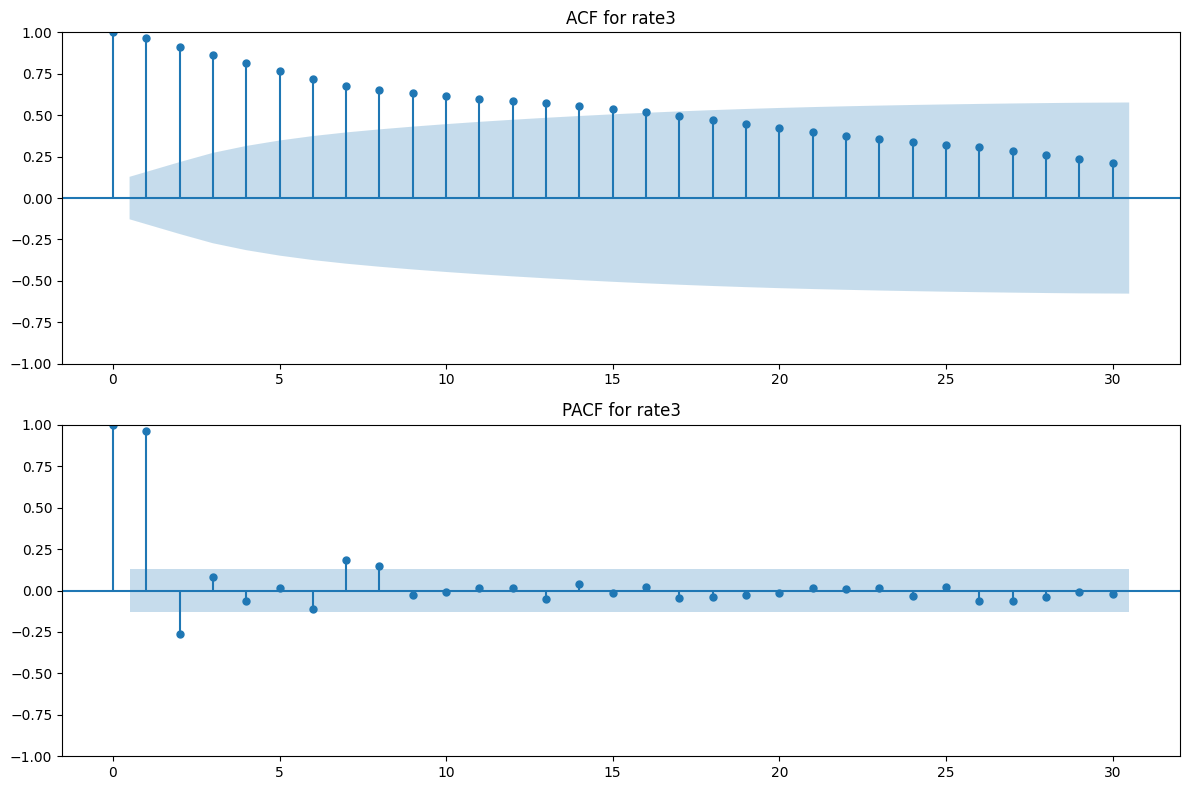


Correlogram Interpretation for rate3:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order


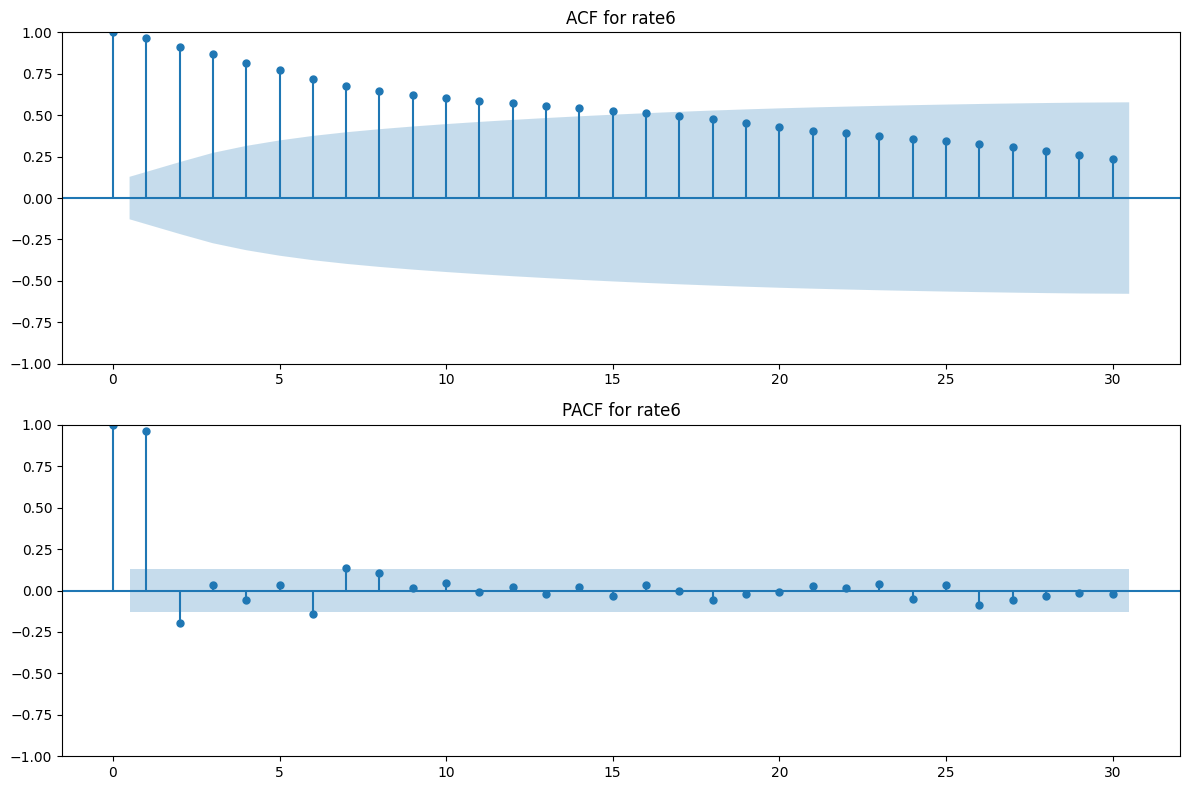


Correlogram Interpretation for rate6:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order


In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot correlograms with interpretation
def plot_correlograms(series, name, lags=30):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}')

    plt.tight_layout()
    plt.show()

    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

# Plot correlograms for original series
plot_correlograms(rate3, "rate3")
plot_correlograms(rate6, "rate6")


# Interpretation for Correlograms

The correlogram confirms that rate3 is non-stationary, displaying persistent autocorrelation. After differencing, it would likely be modeled as an ARIMA(1,1,0) process — one AR term and one differencing order.

The correlogram pattern of rate6 shows short-term dependence and weaker persistence, compatible with stationarity or near-stationarity. It can be represented with a low-order AR(1) model without differencing, i.e., ARIMA(1,0,0).

The correlograms for rate3 and rate6 show positive autocorrelation that declines gradually, with both PACFs cutting off sharply at lag 1. This indicates an autoregressive structure of low order. The persistence observed in rate3 aligns with its confirmed non-stationarity from the unit root tests, suggesting the need for first differencing before modeling, such as ARIMA(1,1,0). In contrast, rate6 displays weaker autocorrelation and can be treated as stationary, consistent with an ARIMA(1,0,0) specification. Together with the Johansen test results, the analysis supports that both rates move jointly in the long run but may differ in their short-run dynamics.

#Final Conclusions

A) When plotting the 3-month (TB3M) and 6-month (TB6M) Treasury bill rates from 1982 to 2008, both series display nearly identical movements. They follow the same business cycles, rising and falling together with a small, mean-reverting spread. This visual pattern suggests a strong long-run relationship between the two maturities, consistent with the term structure of interest rates.

B) Formal unit-root testing shows that both series are integrated of order one, I(1).

For TB3M, the ADF test fails to reject the null of a unit root while the KPSS rejects stationarity → clearly non-stationary.

For TB6M, results are mixed, but the first-differenced series is stationary.
Hence, both series are treated as I(1), meaning their levels are persistent but their first differences are stationary.

c) The Johansen cointegration test rejects the null hypotheses of r = 0 and r ≤ 1 at the 95% confidence level, indicating at least one cointegrating relationship between TB3M and TB6M. Although each rate is non-stationary on its own, a linear combination—the spread—is stationary. Thus, the two interest-rate series share a stable long-run equilibrium relationship.

d) Economically, cointegration implies that short-term and medium-term Treasury rates are linked through expectations and arbitrage: when the spread deviates from equilibrium, market forces drive it back.
If the series were not cointegrated, their relationship would drift without correction, meaning the term structure would be unstable and long-run forecasts using levels would be spurious.

The 3-month and 6-month Treasury bill rates are I(1) but cointegrated, confirming a stable long-run relationship along the yield curve. Although short-term fluctuations occur, the two maturities move together over time, maintaining a consistent equilibrium spread. Consequently, a VECM framework is required to jointly model their short-run dynamics and long-run interdependence.

In [9]:
# Export current Colab notebook to HTML and download it
import json, os
from google.colab import _message, files
import nbformat
from nbconvert import HTMLExporter

# 1) Get the current notebook (correct field is ['ipynb'])
nb_json = _message.blocking_request('get_ipynb')['ipynb']

ipynb_path = "/content/Final Exam Question 19.ipynb"
html_path  = "/content/Final Exam Question 19.html"

# 2) Save the .ipynb properly
with open(ipynb_path, "w") as f:
    json.dump(nb_json, f)

# 3) Convert to HTML (nbconvert programmatic API; no pandoc needed)
nb_node = nbformat.read(ipynb_path, as_version=4)
html_exporter = HTMLExporter()  # default template is fine
body, resources = html_exporter.from_notebook_node(nb_node)

with open(html_path, "w", encoding="utf-8") as f:
    f.write(body)

# 4) Download the HTML
files.download(html_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>